# Fucntion Tranformation

# 🔁 Function Transformation in Data Preprocessing

## ✅ What is Function Transformation?

**Function Transformation** is the process of applying a **mathematical function** to features to:

- Reduce **skewness**
- Handle **non-linear relationships**
- Make data more **normally distributed**
- Improve **model performance**

---

## 🤔 Why Use Function Transformation?

Some machine learning models (especially linear models and neural networks) perform better when:
- Input features are **symmetric** (like normal distribution)
- Relationships between features and target are **linear**
- Outliers are **compressed**

---

## 🔧 Common Function Transformations

---

### 1. **Log Transformation**

**Formula:**  
\[
X' = \log(X + c)
\]
*(Usually `c = 1` to avoid log(0))*

#### 📌 Use When:
- Data is **right-skewed**
- Values span several orders of magnitude (e.g., income, population)
- You want to reduce impact of **large outliers**

```python
import numpy as np
df['col'] = np.log1p(df['col'])  # log(x + 1)


2. Square Root Transformation
Formula:

𝑋
′
=
𝑋
X 
′
 = 
X
​
 
📌 Use When:
Right-skewed data

Less aggressive than log

Suitable for count data (e.g., number of visits)

python
Copy
Edit
df['col'] = np.sqrt(df['col'])
3. Reciprocal Transformation
Formula:

𝑋
′
=
1
𝑋
X 
′
 = 
X
1
​
 
📌 Use When:
You want to compress large values

Effective for positive skew

Data should not contain zero

python
Copy
Edit
df['col'] = 1 / df['col']
4. Box-Cox Transformation
A family of power transformations that normalizes data.

Only works with positive values.

python
Copy
Edit
from scipy.stats import boxcox
df['col'], _ = boxcox(df['col'])
📌 Use When:
You want to normalize skewed data

Model requires normally distributed features (like linear regression)

5. Yeo-Johnson Transformation
Like Box-Cox, but also supports zero and negative values.

python
Copy
Edit
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[['col']] = pt.fit_transform(df[['col']])
📌 Use When:
Data contains zeros or negatives

You want to normalize a feature for a model that assumes normality

6. Exponential Transformation
Formula:

𝑋
′
=
𝑒
𝑋
X 
′
 =e 
X
 
📌 Use When:
Data is left-skewed

You want to stretch out small values

python
Copy
Edit
df['col'] = np.exp(df['col'])
📉 Visualizing Effects of Transformation
python
Copy
Edit
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['original_col'], kde=True)
plt.title("Original")
plt.show()

sns.histplot(np.log1p(df['original_col']), kde=True)
plt.title("After Log Transform")
plt.show()
📊 Summary Table
Transformation	Use When	Handles Zero/Negative?	Effect
Log	Right-skewed, big outliers	No (use log1p)	Compress large values
Sqrt	Moderate right-skew	No	Mild compression
Reciprocal	Right-skewed	No	Aggressive
Box-Cox	Right-skewed	No	Normalize
Yeo-Johnson	Right-skewed or left-skewed	✅ Yes	Normalize
Exponential	Left-skewed	Yes	Stretch small values

⚠️ Tips and Caveats
Always check for zero or negative values before using log, boxcox, or sqrt

Apply transformations after handling missing values

Visualize before and after using histogram or boxplot

Scaling and transformation can be combined using Pipeline

🧠 Final Thoughts
Function transformation helps reshape feature distributions to better align with model assumptions. It’s especially useful when:

Data is not normally distributed

Model assumes linearity or normality

Features have skew or extreme outliers

Use wisely and always visualize the effects!

* Transforming Dataset from non-normal to normal distribution data
* 

In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("D:\Data Science\Datasets\loan.csv")
data

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7976\3401954250.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv("D:\Data Science\Datasets\loan.csv")


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


* We will convert ApplicantIncome and CoapplicantIncome to normal distribution

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7976\2927570251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

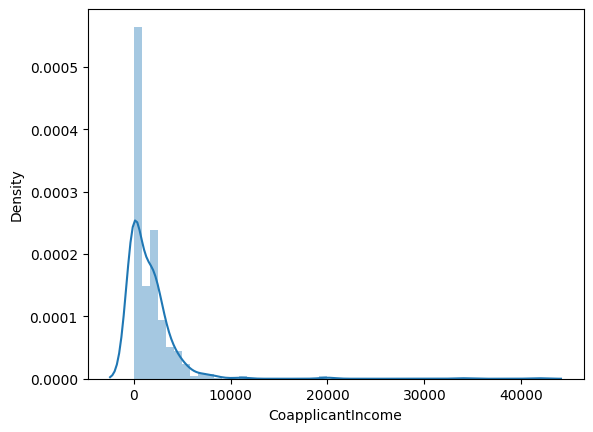

In [14]:
sns.distplot(data['CoapplicantIncome'])

* We can see here the graph is not normal distributed
* But fiirst remove the outlier as it will create trouble while converting

In [16]:
q1 = data['CoapplicantIncome'].quantile(0.25)
q3 = data['CoapplicantIncome'].quantile(0.75)
iqr = q3-q1

In [18]:
min_r = q1 - (1.5*iqr)
max_r = q3+(1.5*iqr)
min_r, max_r`

(-3445.875, 5743.125)

In [21]:
# to remove outlier
data = data[data['CoapplicantIncome']<=max_r]

C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7976\2927570251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome'])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

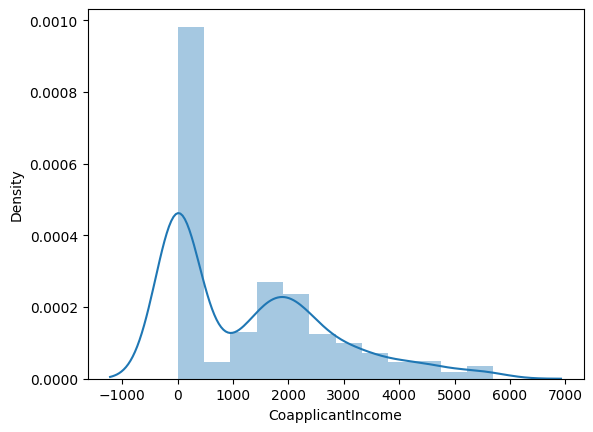

In [23]:
sns.distplot(data['CoapplicantIncome'])

Here the outlier has bee removed or decreased very much

* Now we ill use function transformation

In [24]:
from sklearn.preprocessing import FunctionTransformer

In [27]:
ft = FunctionTransformer(func=np.log1p)

why we are using **log1p** is to also make it work on 0 (log(0) is invalid)

In [29]:
ft.fit(data[['CoapplicantIncome']])

FunctionTransformer(func=<ufunc 'log1p'>)

In [34]:
data['CoapplicantIncome_tf'] = ft.transform(data[['CoapplicantIncome']])

C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7976\1242444753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CoapplicantIncome_tf'] = ft.transform(data[['CoapplicantIncome']])


C:\Users\Harsh Narayankar\AppData\Local\Temp\ipykernel_7976\30206806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CoapplicantIncome_tf'])


<Axes: xlabel='CoapplicantIncome_tf', ylabel='Density'>

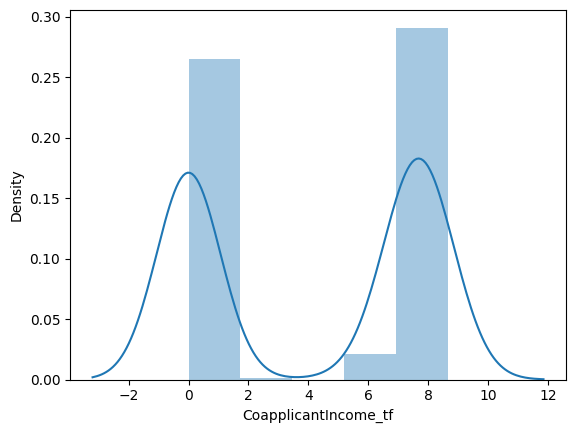

In [36]:
sns.distplot(data['CoapplicantIncome_tf'])